In [1]:
print("Lord_Balaji")

Lord_Balaji


<font color = red>**1.Import Libraries**</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<font color = red>**Load Data**</font>

In [150]:
df = pd.read_csv("E:\Python_Vedeo\DataSets\HR_Analysis\promotion.csv")

In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df.shape

(54808, 14)

In [10]:
df.department.unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [12]:
df.region.unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [14]:
df.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [15]:
df.recruitment_channel.unique()

array(['sourcing', 'other', 'referred'], dtype=object)

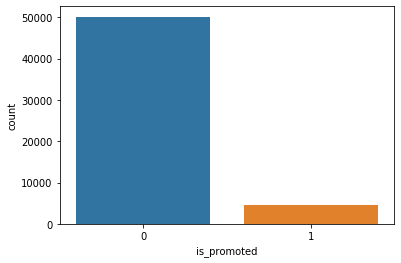

In [16]:
sns.countplot(df.is_promoted)

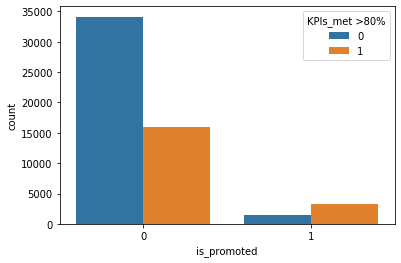

In [20]:
sns.countplot(df.is_promoted, hue = df['KPIs_met >80%'])

<font color = red>**3.Data Cleaning**</font>

In [151]:
df.isnull().sum()/df.shape[0]*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [152]:
df.shape

(54808, 14)

In [153]:
df.dropna(inplace=True)

In [154]:
df.shape

(48660, 14)

In [155]:
df.isnull().sum().sum()

0

<font color = red>**4.Data preparation - One hotencoding**</font>

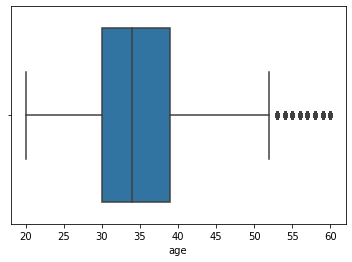

In [156]:
sns.boxplot(df.age)

In [157]:
q3_age = df.age.quantile(0.75)

In [158]:
q3_age

39.0

In [159]:
q1_age = df.age.quantile(0.25)

In [160]:
q1_age

30.0

In [161]:
iqr_age = q3_age-q1_age

In [162]:
iqr_age

9.0

In [163]:
age_ul = q3_age+1.5*iqr_age

In [164]:
age_ll = q1_age-1.5*iqr_age

In [165]:
age_ul, age_ll

(52.5, 16.5)

In [166]:
df1 = df[(df['age']<age_ul) & (df['age']>age_ll)]

In [168]:
df1.shape

(46609, 14)

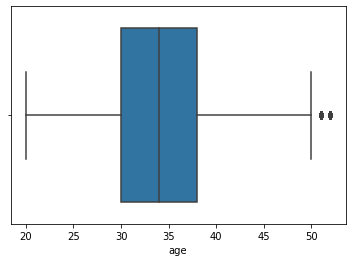

In [169]:
sns.boxplot(df1.age)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e0afc281c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e0afbc74c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e0afc876c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e0afc01108>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e0afbf9ac8>],
 'means': []}

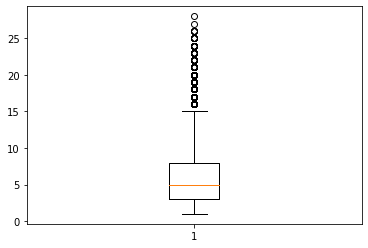

In [184]:
plt.boxplot(df1.length_of_service)

In [172]:
df1.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,46609.000000,46609.000000,46609.000000,46609.000000,46609.000000,46609.000000,46609.000000,46609.000000,46609.000000
mean,39165.407947,1.256088,34.687721,3.338604,6.006801,0.359244,0.023365,63.643974,0.088052
std,22639.270282,0.607082,6.304317,1.259040,3.700039,0.479784,0.151060,13.310823,0.283373
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19555.000000,1.000000,30.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39141.000000,1.000000,34.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58801.000000,1.000000,38.000000,4.000000,8.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,52.000000,5.000000,28.000000,1.000000,1.000000,99.000000,1.000000


In [173]:
q3_length_of_service = df1.length_of_service.quantile(0.75)
q3_length_of_service

8.0

In [175]:
q1_length_of_service = df1.length_of_service.quantile(0.25)
q1_length_of_service

3.0

In [177]:
iqr_length_of_service = q3_length_of_service - q1_length_of_service
iqr_length_of_service

5.0

In [179]:
length_of_service_ul = q3_length_of_service + 1.5*iqr_length_of_service

In [180]:
length_of_service_ll = q1_length_of_service - 1.5*iqr_length_of_service

In [183]:
df2 = df1[((df1['length_of_service']<length_of_service_ul) & (df['length_of_service']>length_of_service_ll))]

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [185]:
df2.shape, df1.shape, df.shape

((45092, 14), (46609, 14), (48660, 14))

{'whiskers': [<matplotlib.lines.Line2D at 0x1e0afd2be48>,
 'caps': [<matplotlib.lines.Line2D at 0x1e0afd2bfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e0afd2b7c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e0afd2ffc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e0afd369c8>],
 'means': []}

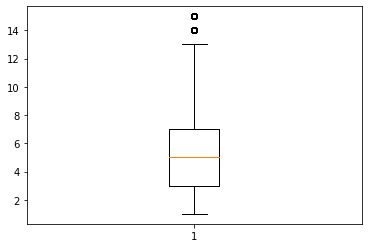

In [186]:
plt.boxplot(df2.length_of_service)

In [187]:
df2.length_of_service.unique()

array([ 5,  2,  9,  4,  6, 10, 11,  7,  3,  8, 12,  1, 15, 13, 14],
      dtype=int64)

In [188]:
df2.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000
mean,39158.319369,1.258915,34.257318,3.338752,5.600195,0.362969,0.023796,63.705358,0.088419
std,22625.677203,0.609305,5.926380,1.260194,2.987879,0.480861,0.152414,13.342909,0.283907
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19580.500000,1.000000,30.000000,3.000000,3.000000,0.000000,0.000000,52.000000,0.000000
50%,39109.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58804.750000,1.000000,38.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,52.000000,5.000000,15.000000,1.000000,1.000000,99.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1e0b0246288>,
 'caps': [<matplotlib.lines.Line2D at 0x1e0b0289f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e0b0284708>],
 'medians': [<matplotlib.lines.Line2D at 0x1e0b028bf08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e0b028be88>],
 'means': []}

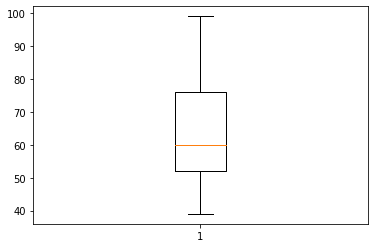

In [189]:
plt.boxplot(df2.avg_training_score)

<font color = red>**5.One Hot Encoding**</font>

In [190]:
dummies = [pd.get_dummies(df2['department'], prefix = 'department', drop_first = True),
          pd.get_dummies(df2['region'], prefix = 'region', drop_first = True),
          pd.get_dummies(df2['education'], prefix = 'education', drop_first = True),
          pd.get_dummies(df2['gender'], prefix = 'gender', drop_first = True),
          pd.get_dummies(df2['recruitment_channel'], prefix = 'recruitment_channel', drop_first = True),
          pd.get_dummies(df2['no_of_trainings'], prefix = 'no_of_trainings', drop_first = True),
          pd.get_dummies(df2['previous_year_rating'], prefix = 'previous_year_rating', drop_first = True)]

In [192]:
dm = pd.concat(dummies, axis = 1)

In [193]:
df3 = pd.concat([df2, dm], axis=1)

In [194]:
df3.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,no_of_trainings_5,no_of_trainings_6,no_of_trainings_7,no_of_trainings_8,no_of_trainings_9,no_of_trainings_10,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
0,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,...,0,0,0,0,0,0,0,0,0,1
1,56275,Sales & Marketing,region_1,Master's & above,m,other,1,42,5.0,5,...,0,0,0,0,0,0,0,0,0,1
2,14107,Sales & Marketing,region_1,Master's & above,m,sourcing,1,35,4.0,2,...,0,0,0,0,0,0,0,0,1,0
3,42068,Operations,region_1,Master's & above,m,other,1,38,5.0,9,...,0,0,0,0,0,0,0,0,0,1
4,14912,Sales & Marketing,region_1,Bachelor's,m,other,1,38,3.0,4,...,0,0,0,0,0,0,0,1,0,0


In [195]:
df3.shape

(45092, 73)

In [196]:
df3.drop(columns = ['employee_id','department','education','gender','recruitment_channel','previous_year_rating'], inplace=True)

In [197]:
df3.shape

(45092, 67)

In [200]:
pd.set_option('max_columns', None)

In [201]:
df3.head()

,region,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,no_of_trainings_2,no_of_trainings_3,no_of_trainings_4,no_of_trainings_5,no_of_trainings_6,no_of_trainings_7,no_of_trainings_8,no_of_trainings_9,no_of_trainings_10,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
0,region_1,1,32,5,1,0,54,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,region_1,1,42,5,1,0,51,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,region_1,1,35,2,1,0,52,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,region_1,1,38,9,1,0,61,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,region_1,1,38,4,1,0,49,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [202]:
df3.drop(columns = 'region', inplace=True)

In [218]:
df3.is_promoted.shape, df3.shape

((45092,), (45092, 66))

<font color = red>**6.Split data into X and y veraibles**</font>

In [219]:
X = df3.drop(df3['is_promoted'])

In [208]:
y = df3['is_promoted']

In [224]:
len(X.columns)

66

In [226]:
y.shape, X.no_of_trainings.shape

((45092,), (45090,))

<font color = red>**7.Train the data**</font>

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

ValueError: Found input variables with inconsistent numbers of samples: [45090, 45092]

In [ ]:
X_train, X_test, y_train, y_test